In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns

In [3]:
df=pd.read_csv('Algerian_forest_fires.csv',skiprows=1)

In [4]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.shape

(246, 14)

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Observation:Here we cn see uneccessary spacing in the column names so we have to fix this.

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Restructuring of Data frame is done successfully now we will move into the values

In [10]:
df1=df.copy()

In [11]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
df1.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [13]:
df1['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

Here we can see couple of wrong entries we need to address this issue

In [15]:
df1.drop(df[df['day']=='day'].index,inplace=True)

In [16]:
df1['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset'], dtype=object)

In [17]:
df1.drop(df[df['day']=='Sidi-Bel Abbes Region Dataset'].index,inplace=True)

In [18]:
df1['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [19]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [20]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [21]:
df1['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

observation: There is an incorrect entry of the string 'fire ' in this column.

In [24]:
df1['FWI'].replace('fire   ',np.nan,inplace=True)

In [25]:
df1['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', nan, '14.1', '9.1', '13', '17.3',
       '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4

In [26]:
df2=df1.copy()

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


we need to chnage the datatype of the columns

In [28]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [29]:
df2=df2.astype({"day":int,"month":int,"year":int,"Temperature":int,"RH":int,"Ws":int,"Rain":float,"FFMC":float,"DMC":float,"DC":float,"ISI":float,"BUI":float,"FWI":float})

ValueError: could not convert string to float: '14.6 9': Error while type casting for column 'DC'

observation:Here in the column DC we have found an entry error '14.6 9' we need to fix this

In [31]:
df2['DC'].replace('14.6 9','14.69',inplace=True)

In [32]:
df2=df2.astype({"day":int,"month":int,"year":int,"Temperature":int,"RH":int,"Ws":int,"Rain":float,"FFMC":float,"DMC":float,"DC":float,"ISI":float,"BUI":float,"FWI":float})

column datatypes has been changed

In [53]:
df2['Classes']=df['Classes'].str.strip()

In [54]:
df2['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [55]:
df3=df2.copy()

# checking whether we can drop the columns which have missing values

In [56]:
cols=[col for col in df3.columns if df[col].isnull().mean()*100>0.03]

In [57]:
cols

['month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [58]:
drop_nan_df=df3[cols].dropna()

In [59]:
drop_nan_df

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
243,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [60]:
drop_nan_df.shape

(243, 13)

array([[<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>,
        <Axes: title={'center': 'FWI'}>]], dtype=object)

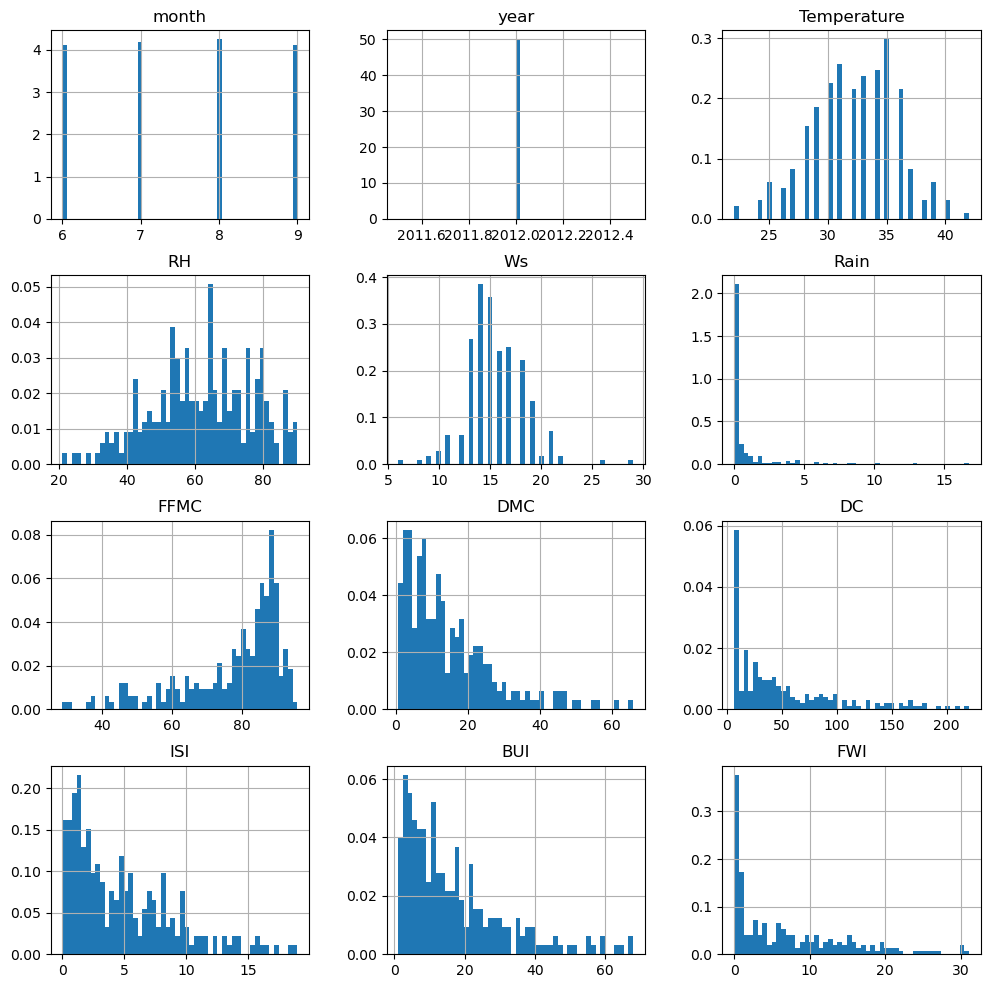

In [61]:
drop_nan_df.hist(bins=50,density=True,figsize=(12,12))

observation: here we can see 'year' column is not providing any valuable information so we can drop the column

observation 2: we can see some are right skewed and some are left skewed few are normally distributed

<Axes: >

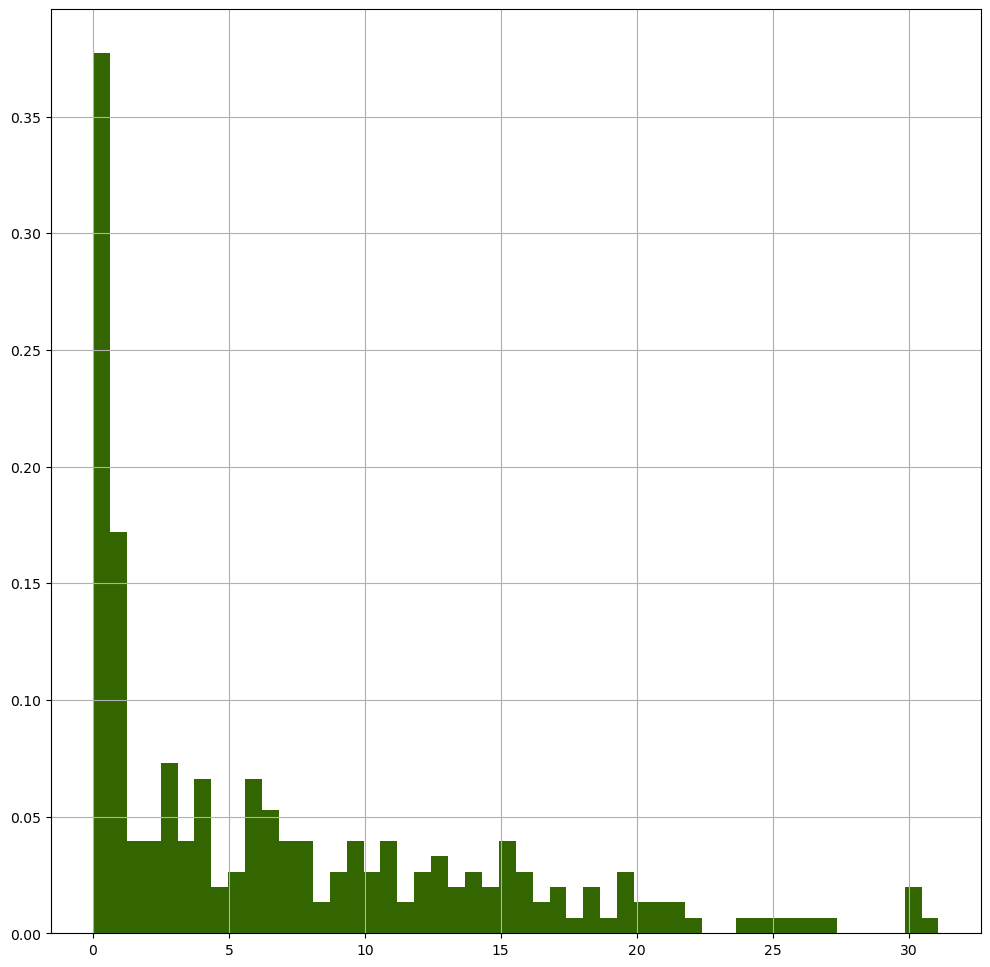

In [62]:
fig= plt.figure()
ax = fig.add_subplot(111)

df3['FWI'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
drop_nan_df['FWI'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green', alpha=0.8)

<Axes: ylabel='Density'>

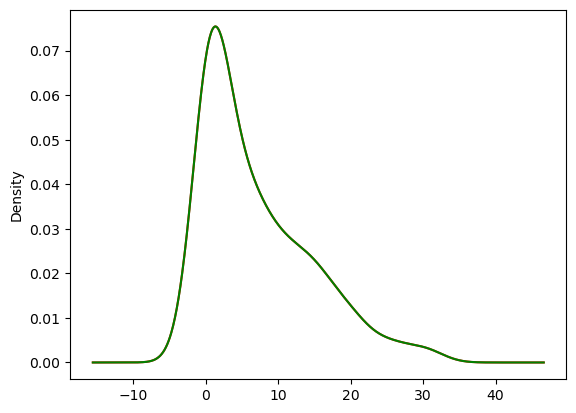

In [63]:
fig= plt.figure()
ax = fig.add_subplot(111)

df3['FWI'].plot.density(color='red')
drop_nan_df['FWI'].plot.density(color='green')

In [64]:
df3['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [67]:
temp = pd.concat([
    # % of observations per category, original data 
    df3['Classes'].value_counts()/len(df3),
    # % of observations per category, cca data 
    df3['Classes'].value_counts()/len(drop_nan_df)
],axis=1)

temp.columns=['original','cca']
temp

,original,cca
Classes,,
fire,0.561475,0.563786
not fire,0.434426,0.436214


## mean median imputation

In [68]:
df4=df2.copy()

In [69]:
df4.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [70]:
X=df4.drop(columns=['Classes'])

In [71]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [72]:
y=df4['Classes']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X_train.shape,X_test.shape

((195, 13), (49, 13))

In [75]:
X_train.isnull().mean()

day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.005128
dtype: float64

In [76]:
mean_FWI=X_train['FWI'].mean()
median_FWI=X_train['FWI'].median()

In [77]:
mean_FWI

7.310309278350514

In [78]:
median_FWI

4.2

In [79]:
X_train.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
133,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0
136,13,6,2012,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9
98,7,9,2012,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6
156,3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2
108,17,9,2012,31,52,14,0.0,87.7,6.4,24.3,6.2,7.7,5.9


In [80]:
X_train['FWI_mean']=X_train['FWI'].fillna(mean_FWI)
X_train['FWI_median']=X_train['FWI'].fillna(median_FWI)

In [82]:
print("The variance before imputing is {}".format(X_train['FWI'].var()))
print("The variance after mean imputing is {}".format(X_train['FWI_mean'].var()))
print("The variance after median imputing is {}".format(X_train['FWI_median'].var()))

The variance before imputing is 59.14548902302227
The variance after mean imputing is 58.840615368264395
The variance after median imputing is 58.890225746761786


observation: we can see after imputing mean and median the variance has been reduced

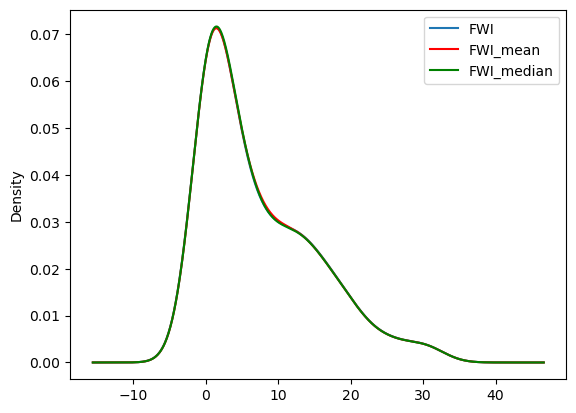

In [83]:
fig= plt.figure()
ax = fig.add_subplot(111)
X_train['FWI'].plot(kind='kde', ax= ax)
X_train['FWI_mean'].plot(kind='kde', ax= ax,color='red')
X_train['FWI_median'].plot(kind='kde', ax= ax,color='green')
#Add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

observation: we can see the tip of the curve and distribution is almost the same

In [84]:
X_train.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
day,79.944330,-0.297938,0.0,4.072165,-13.959794,1.013402,-2.159485,36.982784,63.475876,253.902155,9.166082,75.681649,28.798868,28.650420,28.679278
month,-0.297938,1.230346,0.0,-0.358710,0.359794,-0.238647,0.127193,-0.174354,0.747737,6.806014,0.237428,1.203273,0.618439,0.615251,0.623555
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,4.072165,-0.358710,0.0,13.911710,-36.000000,-2.408670,-2.875734,36.959833,23.270552,69.642686,9.742202,25.275588,16.277202,16.193299,16.113547
RH,-13.959794,0.359794,0.0,-36.000000,223.521649,8.672165,8.044021,-133.794639,-77.910412,-159.553340,-44.478454,-76.731134,-67.011191,-66.665772,-66.261753
Ws,1.013402,-0.238647,0.0,-2.408670,8.672165,6.824637,1.380190,-5.933212,-0.276640,9.337032,0.263050,0.971964,0.650836,0.647481,0.609907
Rain,-2.159485,0.127193,0.0,-2.875734,8.044021,1.380190,4.372730,-17.600724,-7.934450,-30.803392,-3.136511,-9.394752,-5.266699,-5.239551,-5.230277
FFMC,36.982784,-0.174354,0.0,36.959833,-133.794639,-5.933212,-17.600724,204.044276,112.187406,363.892252,45.172354,126.541898,76.692257,76.296936,76.121837
DMC,63.475876,0.747737,0.0,23.270552,-77.910412,-0.276640,-7.934450,112.187406,172.124334,576.256427,36.981086,193.597786,88.485960,88.029847,88.068045
DC,253.902155,6.806014,0.0,69.642686,-159.553340,9.337032,-30.803392,363.892252,576.256427,2488.108020,106.913077,706.523114,288.884588,287.395492,287.981702


In [85]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
day,1.000000,-0.030041,NaN,0.122107,-0.104430,0.043386,-0.115499,0.289563,0.541120,0.569296,0.240736,0.563718,0.417777,0.417733,0.417977
month,-0.030041,1.000000,NaN,-0.086704,0.021696,-0.082357,0.054837,-0.011004,0.051382,0.123011,0.050265,0.072246,0.072351,0.072310,0.073255
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.122107,-0.086704,NaN,1.000000,-0.645584,-0.247199,-0.368708,0.693709,0.475549,0.374327,0.613364,0.451311,0.568613,0.565987,0.562962
RH,-0.104430,0.021696,NaN,-0.645584,1.000000,0.222038,0.257298,-0.626494,-0.397205,-0.213950,-0.698621,-0.341804,-0.585632,-0.581306,-0.577539
Ws,0.043386,-0.082357,NaN,-0.247199,0.222038,1.000000,0.252652,-0.158997,-0.008072,0.071653,0.023646,0.024779,0.032378,0.032311,0.030423
Rain,-0.115499,0.054837,NaN,-0.368708,0.257298,0.252652,1.000000,-0.589240,-0.289214,-0.295316,-0.352227,-0.299209,-0.326712,-0.326647,-0.325932
FFMC,0.289563,-0.011004,NaN,0.693709,-0.626494,-0.158997,-0.589240,1.000000,0.598633,0.510712,0.742612,0.589980,0.697373,0.696316,0.694425
DMC,0.541120,0.051382,NaN,0.475549,-0.397205,-0.008072,-0.289214,0.598633,1.000000,0.880562,0.661927,0.982753,0.874797,0.874722,0.874733
DC,0.569296,0.123011,NaN,0.374327,-0.213950,0.071653,-0.295316,0.510712,0.880562,1.000000,0.503324,0.943316,0.752163,0.751116,0.752331


<Axes: >

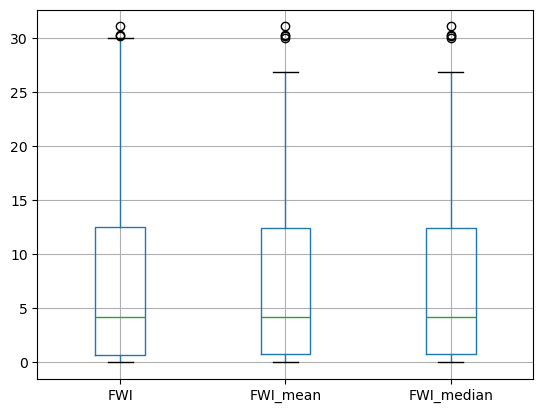

In [86]:
X_train.boxplot(['FWI','FWI_mean','FWI_median'])

observation:
Mean imputation typically reduces variability if the missing values are replaced by the mean, which can lead to a narrower IQR.
Median imputation might also reduce variability but could retain more information about the distribution if the data is skewed.

# Random Imputation

In [87]:
df5=df2.copy()

In [88]:
df5.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [89]:
df5.isnull().mean()

day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.004098
Classes        0.004098
dtype: float64

<Axes: xlabel='Classes'>

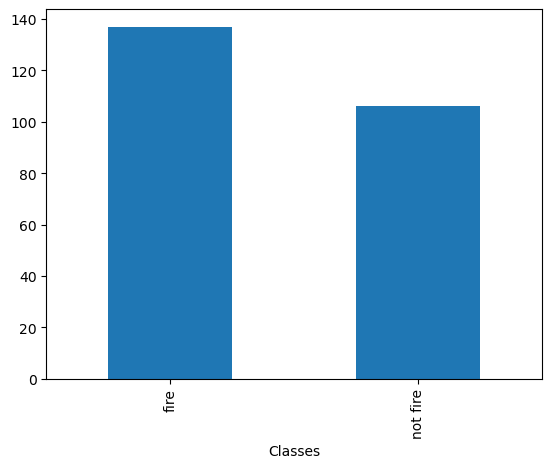

In [91]:
df5['Classes'].value_counts().sort_values(ascending=False).plot.bar()

In [92]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 31.0+ KB


In [93]:
X=df5.drop(columns=['Classes'])

In [94]:
y=df5['Classes']

In [95]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
X_train.shape,X_test.shape

((195, 13), (49, 13))

In [99]:
X_train['FWI_imputed']=X_train['FWI']
X_test['FWI_imputed']=X_train['FWI']

In [101]:
X_train[X_train['FWI_imputed'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_imputed
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN


In [105]:
'''
here we are dropping the null values from the column and choosing the random value from the sample and we are selecting only the 
number of null values '''
X_train['FWI_imputed'].dropna().sample(X_train['FWI_imputed'].isnull().sum())

193    12.7
Name: FWI_imputed, dtype: float64

In [110]:
X_train['FWI_imputed'][X_train['FWI_imputed'].isnull()]=X_train['FWI'].dropna().sample(X_train['FWI'].isnull().sum()).values
X_test['FWI_imputed'][X_test['FWI_imputed'].isnull()]=X_test['FWI'].dropna().sample(X_test['FWI'].isnull().sum()).values

C:\Users\Harshith\AppData\Local\Temp\ipykernel_39892\4130904793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FWI_imputed'][X_train['FWI_imputed'].isnull()]=X_train['FWI'].dropna().sample(X_train['FWI'].isnull().sum()).values
C:\Users\Harshith\AppData\Local\Temp\ipykernel_39892\4130904793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FWI_imputed'][X_test['FWI_imputed'].isnull()]=X_test['FWI'].dropna().sample(X_test['FWI'].isnull().sum()).values


ValueError: cannot set using a list-like indexer with a different length than the value

In [111]:
X_train['FWI_imputed'][167]

7.1

In [113]:
print('Original FMI Variance', X_train['FWI'].var())
print('FMI Variance After imputation', X_train['FWI_imputed'].var())

Original FMI Variance 59.14548902302227
FMI Variance After imputation 58.84084218873907


<Axes: >

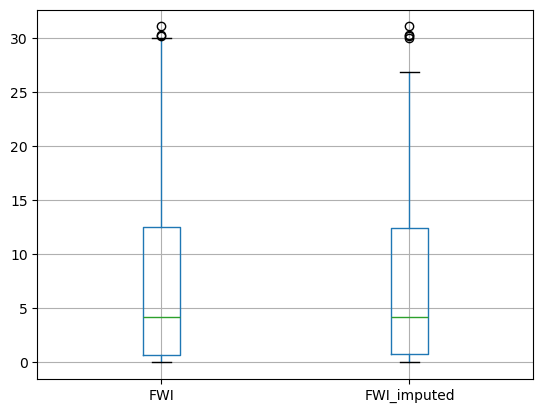

In [114]:
X_train.boxplot(['FWI','FWI_imputed'])

In [115]:
##handling missing values

In [116]:
df6=df2.copy()

In [117]:
df6.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [118]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 31.0+ KB


In [119]:
df6['FWI_imputed']=df6['FWI']

In [122]:
df6['FWI_imputed'][df6['FWI_imputed'].isnull()]=df6['FWI'].dropna().sample(df6['FWI'].isnull().sum()).values

C:\Users\Harshith\AppData\Local\Temp\ipykernel_39892\4122630848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['FWI_imputed'][df6['FWI_imputed'].isnull()]=df6['FWI'].dropna().sample(df6['FWI'].isnull().sum()).values


In [123]:
df6['FWI_imputed'].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7, 14.1,  9.1,
       13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6, 12.7,
       21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5, 26.9,
       31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8, 19.3,
       17.5, 15.4, 15.2,  6.5])

In [125]:
df6['classes_imputed']=df6['Classes']

In [126]:
df6['classes_imputed'][df6['classes_imputed'].isnull()]=df6['Classes'].dropna().sample(df6['Classes'].isnull().sum()).values

C:\Users\Harshith\AppData\Local\Temp\ipykernel_39892\564400780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['classes_imputed'][df6['classes_imputed'].isnull()]=df6['Classes'].dropna().sample(df6['Classes'].isnull().sum()).values


In [127]:
df6['classes_imputed'].unique()

array(['not fire', 'fire'], dtype=object)

In [128]:
df6.isnull().mean()

day                0.000000
month              0.000000
year               0.000000
Temperature        0.000000
RH                 0.000000
Ws                 0.000000
Rain               0.000000
FFMC               0.000000
DMC                0.000000
DC                 0.000000
ISI                0.000000
BUI                0.000000
FWI                0.004098
Classes            0.004098
FWI_imputed        0.000000
classes_imputed    0.000000
dtype: float64

In [129]:
df6.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,FWI_imputed,classes_imputed
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.5,not fire


Handling missing values completed

In [142]:
df7=df6.copy()

In [143]:
df7.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'FWI_imputed',
       'classes_imputed'],
      dtype='object')

In [144]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              244 non-null    int32  
 1   month            244 non-null    int32  
 2   year             244 non-null    int32  
 3   Temperature      244 non-null    int32  
 4   RH               244 non-null    int32  
 5   Ws               244 non-null    int32  
 6   Rain             244 non-null    float64
 7   FFMC             244 non-null    float64
 8   DMC              244 non-null    float64
 9   DC               244 non-null    float64
 10  ISI              244 non-null    float64
 11  BUI              244 non-null    float64
 12  FWI              243 non-null    float64
 13  Classes          243 non-null    object 
 14  FWI_imputed      244 non-null    float64
 15  classes_imputed  244 non-null    object 
dtypes: float64(8), int32(6), object(2)
memory usage: 34.8+ KB


In [145]:
df7.drop(columns=['FWI','Classes'],axis=1,inplace=True)

In [146]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              244 non-null    int32  
 1   month            244 non-null    int32  
 2   year             244 non-null    int32  
 3   Temperature      244 non-null    int32  
 4   RH               244 non-null    int32  
 5   Ws               244 non-null    int32  
 6   Rain             244 non-null    float64
 7   FFMC             244 non-null    float64
 8   DMC              244 non-null    float64
 9   DC               244 non-null    float64
 10  ISI              244 non-null    float64
 11  BUI              244 non-null    float64
 12  FWI_imputed      244 non-null    float64
 13  classes_imputed  244 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 31.0+ KB


In [147]:
df7.rename(columns={'FWI_imputed':'FWI','classes_imputed':'Classes'},inplace=True)

In [148]:
df7.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

imputed and renamed the column names

In [149]:
df8=df7.copy()

In [150]:
sns.countplot(df8['Classes'])

ValueError: could not convert string to float: 'not fire'

In [151]:
df8['Classes'] = pd.Categorical(df8['Classes'])

# Now plot using Seaborn countplot
sns.countplot(df8['Classes'])

ValueError: could not convert string to float: 'not fire'

In [152]:
df8['Classes'].unique()

['not fire', 'fire']
Categories (2, object): ['fire', 'not fire']

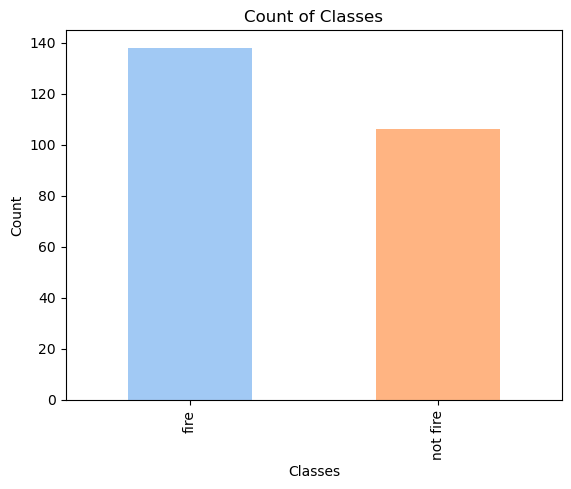

In [156]:
class_counts = df8['Classes'].value_counts()
colors = sns.color_palette('pastel')

# Plot the counts using pandas bar plot
class_counts.plot(kind='bar',color=colors)

# Optionally, add labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Classes')
plt.show()

<Axes: ylabel='count'>

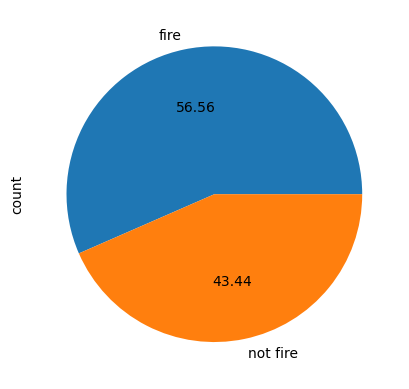

In [157]:
df7['Classes'].value_counts().plot(kind='pie',autopct='%0.2f')

In [158]:
df7.to_csv('forest_updated')